# Assesing the performance of GEODYN's atmospheric density models

This notebook provides tools and visuals for assessing the performance of the atmospheric density models that are present in GEODYN.

There is no single "good" way to assess the atmospheric density model.  We therefore do a cross-analysis of many different features to determine how well the model is doing.


### Overview of Methods:

1. Compare density values directly
    - The density output from the density file will show any different values for density


2. Compare the model trajectories
    - The trajectory output

3. Look at the residuals
    - Cd is constant over an arc, density model is not.  With a better density model, you have better residuals--- errors won't get into Cd unless density models are different by some constant. Residuals will be helpful to look at.

4. Look at Cd


5. Arc overlaps
    - With enough arc/orbit solutions, you can look at the quality of orbit overlap.  With time series of arcs, you can judge the orbit quality by looking at the overlap

6. ~~Remove empirical accelerations~~
    -~~If you remove empirical accelerations, SLR data becomes good indicator of how well the dynamical model is representing the orbit~~

7. Use empirical accelerations
    - Use amplitude of empirical acceleration.  with reduced amplitudes, the model has been improved.

8. ~~Orbit determination (OD) plus a prediction~~
    - ~~Comparing predicted with OD (w/o empirical accel.). Differences between orbit and actual tells you how good your models are.~~ 




First load all the data:


In [1]:
import numpy as np
import pandas as pd
SAT_ID = 7501001


In [2]:
%load_ext autoreload
%autoreload 2



##################################
# INPUT PARAMETERS:
##################################
sat_file = 'starlette'
arc = '030914_2wk'
grav_id ='goco05s' 
local_path = '/data/analysis/starlette_analysis/'


##################################
# PATH TO DENSITY MODEL RUNS:
##################################

msis86_model = 'msis86'
path_to_msis86 = '/data/runs_geodyn/st/results/'+ grav_id+'_'+msis86_model+'/'

dtm87_model = 'dtm87'
path_to_dtm87 = '/data/runs_geodyn/st/results/'+ grav_id+'_'+dtm87_model+'/'

jaachia71_model = 'jaachia71'
path_to_jaachia71 = '/data/runs_geodyn/st/results/'+ grav_id+'_'+jaachia71_model+'/'

import sys  
sys.path.insert(0, '/data/analysis/util_funcs/py_starlette')
from a_ReadStarlette import ReadStarlette

##########################################
# Load data from each density model run:
##########################################

AdjustedParams_msis86, Trajectory_msis86, Density_msis86, Resids_msis86  = ReadStarlette(arc, 
                                                                   sat_file,
                                                                   grav_id, 
                                                                   local_path, 
                                                                   path_to_msis86)

AdjustedParams_dtm87, Trajectory_dtm87, Density_dtm87, Resids_dtm87 = ReadStarlette(arc, 
                                                                   sat_file,
                                                                   grav_id, 
                                                                   local_path, 
                                                                   path_to_dtm87)

AdjustedParams_jaachia, Trajectory_jaachia, Density_jaachia, Resids_jaachia = ReadStarlette(arc, 
                                                                   sat_file,
                                                                   grav_id, 
                                                                   local_path, 
                                                                   path_to_jaachia71)


The base file name for this arc is: st030914_2wk.goco05s
File exists: iieout /data/runs_geodyn/st/results/goco05s_msis86/IIEOUT/st030914_2wk.goco05s
File exists: ascii_xyz /data/runs_geodyn/st/results/goco05s_msis86/XYZ_TRAJ/st030914_2wk.goco05s
File exists: densityfil /data/runs_geodyn/st/results/goco05s_msis86/DENSITY/st030914_2wk.goco05s
Loading data... 

Parameter adjustment data loaded
Trajectory data loaded
Density data loaded
Residual data loaded
The base file name for this arc is: st030914_2wk.goco05s
File exists: iieout /data/runs_geodyn/st/results/goco05s_dtm87/IIEOUT/st030914_2wk.goco05s
File exists: ascii_xyz /data/runs_geodyn/st/results/goco05s_dtm87/XYZ_TRAJ/st030914_2wk.goco05s
File exists: densityfil /data/runs_geodyn/st/results/goco05s_dtm87/DENSITY/st030914_2wk.goco05s
Loading data... 

Parameter adjustment data loaded
Trajectory data loaded
Density data loaded
Residual data loaded
The base file name for this arc is: st030914_2wk.goco05s
File exists: iieout /data/runs

## 1. Compare density values directly
The density output from the density file will show any different values for density

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


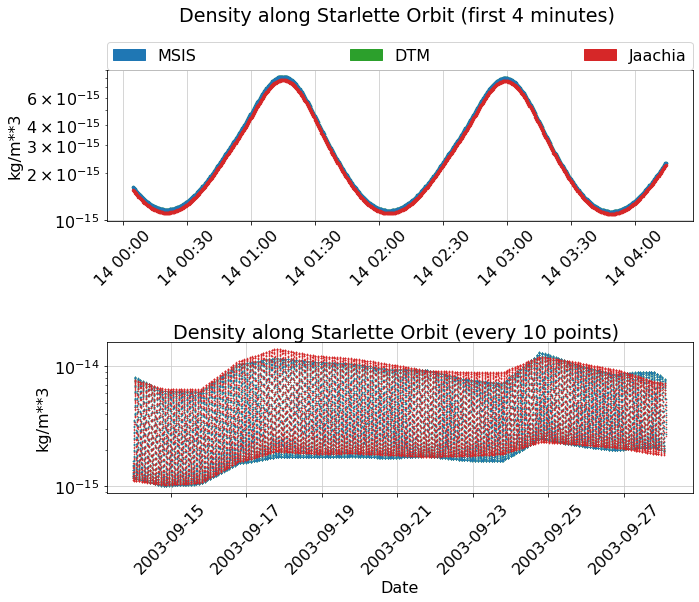

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'
   
color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'
msis_patch = mpatches.Patch(color=color86, label='MSIS')
dtm_patch = mpatches.Patch(color=color87, label='DTM')
jaachia_patch = mpatches.Patch(color=color71, label='Jaachia')


data_nums = 1000

fig, ( ax1, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=False)
ax1.set_title('Density along Starlette Orbit (first 4 minutes) ', y=1.3)
ax1.plot(Density_dtm87['Date'][:data_nums], Density_dtm87['rho (kg/m**3)'][:data_nums],'.', color = color87, label = 'DTM 87')
ax1.plot(Density_msis86['Date'][:data_nums], Density_msis86['rho (kg/m**3)'][:data_nums],'.', color = color86, label = 'MSIS 86')
ax1.plot(Density_jaachia['Date'][:data_nums], Density_jaachia['rho (kg/m**3)'][:data_nums],'.', color = color71, label = 'Jacchia 71')
ax1.set(ylabel=  'kg/m**3')  
# ax1.set(xlabel=  'Date')  
ax1.set_yscale('log')

data_nums = 10
ax2.set_title('Density along Starlette Orbit (every '+str(data_nums)+' points) ')
ax2.plot(Density_dtm87['Date'][::data_nums], Density_dtm87['rho (kg/m**3)'][::data_nums],'.', ms=1, color = color87, label = 'DTM 87')
ax2.plot(Density_msis86['Date'][::data_nums], Density_msis86['rho (kg/m**3)'][::data_nums],'.',ms=1,  color = color86, label = 'MSIS 86')
ax2.plot(Density_jaachia['Date'][::data_nums], Density_jaachia['rho (kg/m**3)'][::data_nums],'.',ms=1,  color = color71, label = 'Jacchia 71')
ax2.set(ylabel=  'kg/m**3')  
ax2.set(xlabel=  'Date')  
ax2.set_yscale('log')


fig.axes[0].legend( handles=[msis_patch, dtm_patch, jaachia_patch],bbox_to_anchor=(0, 1.0, 1.0, .08), ncol=3, mode="expand", borderaxespad=0.)
fig.tight_layout(h_pad= 5 )


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



## 2. Compare the model trajectories
The trajectory output


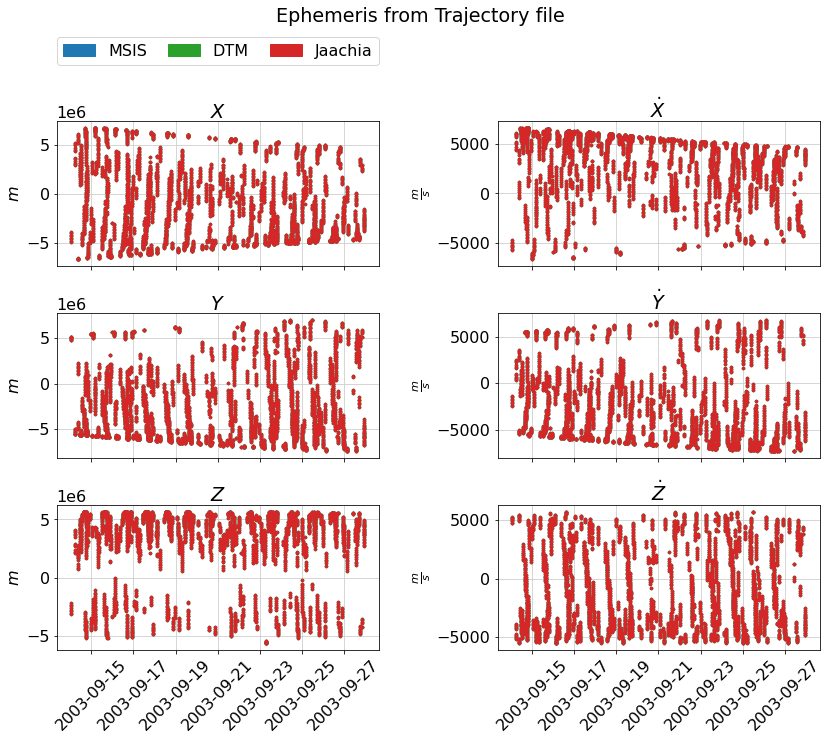

In [4]:
fig, ( axs) = plt.subplots(3,2, figsize=(12,10), sharex=True)


fig.suptitle('Ephemeris from Trajectory file', y=.95)
axs[0,0].set_title(r'$X$' )
axs[0,0].plot(Trajectory_msis86[SAT_ID]['Date'], Trajectory_msis86[SAT_ID]['X'].values.astype(float),'.', color = color86,  )
axs[0,0].plot(Trajectory_jaachia[SAT_ID]['Date'], Trajectory_jaachia[SAT_ID]['X'].values.astype(float),'.', color = color87,  )
axs[0,0].plot(Trajectory_dtm87[SAT_ID]['Date'], Trajectory_dtm87[SAT_ID]['X'].values.astype(float),'.', color = color71,  )

axs[0,0].set(ylabel=  r'$m$') 

axs[1,0].set_title(r'$Y$' )
axs[1,0].plot(Trajectory_msis86[SAT_ID]['Date'], Trajectory_msis86[SAT_ID]['Y'].values.astype(float),'.', color = color86,  )
axs[1,0].plot(Trajectory_jaachia[SAT_ID]['Date'], Trajectory_jaachia[SAT_ID]['Y'].values.astype(float),'.', color = color87,  )
axs[1,0].plot(Trajectory_dtm87[SAT_ID]['Date'], Trajectory_dtm87[SAT_ID]['Y'].values.astype(float),'.', color = color71,  )

axs[1,0].set(ylabel=  r'$m$') 

axs[2,0].set_title(r'$Z$' )
axs[2,0].plot(Trajectory_msis86[SAT_ID]['Date'], Trajectory_msis86[SAT_ID]['Z'].values.astype(float),'.', color = color86,  )
axs[2,0].plot(Trajectory_jaachia[SAT_ID]['Date'], Trajectory_jaachia[SAT_ID]['Z'].values.astype(float),'.', color = color87,  )
axs[2,0].plot(Trajectory_dtm87[SAT_ID]['Date'], Trajectory_dtm87[SAT_ID]['Z'].values.astype(float),'.', color = color71,  )

axs[2,0].set(ylabel=  r'$m$') 

axs[0,1].set_title(r'$\dot{X}$' )
axs[0,1].plot(Trajectory_msis86[SAT_ID]['Date'], Trajectory_msis86[SAT_ID]['XDOT'].values.astype(float),'.', color = color86,  )
axs[0,1].plot(Trajectory_jaachia[SAT_ID]['Date'], Trajectory_jaachia[SAT_ID]['XDOT'].values.astype(float),'.', color = color87,  )
axs[0,1].plot(Trajectory_dtm87[SAT_ID]['Date'], Trajectory_dtm87[SAT_ID]['XDOT'].values.astype(float),'.', color = color71,  )

axs[0,1].set(ylabel=  r'$\frac{m}{s}$') 

axs[1,1].set_title(r'$\dot{Y}$' )
axs[1,1].plot(Trajectory_msis86[SAT_ID]['Date'], Trajectory_msis86[SAT_ID]['YDOT'].values.astype(float),'.', color = color86,  )
axs[1,1].plot(Trajectory_jaachia[SAT_ID]['Date'], Trajectory_jaachia[SAT_ID]['YDOT'].values.astype(float),'.', color = color87,  )
axs[1,1].plot(Trajectory_dtm87[SAT_ID]['Date'], Trajectory_dtm87[SAT_ID]['YDOT'].values.astype(float),'.', color = color71,  )

axs[1,1].set(ylabel=  r'$\frac{m}{s}$') 

axs[2,1].set_title(r'$\dot{Z}$' )
axs[2,1].plot(Trajectory_msis86[SAT_ID]['Date'], Trajectory_msis86[SAT_ID]['ZDOT'].values.astype(float),'.', color = color86,  )
axs[2,1].plot(Trajectory_jaachia[SAT_ID]['Date'], Trajectory_jaachia[SAT_ID]['ZDOT'].values.astype(float),'.', color = color87,  )
axs[2,1].plot(Trajectory_dtm87[SAT_ID]['Date'], Trajectory_dtm87[SAT_ID]['ZDOT'].values.astype(float),'.', color = color71,  )

axs[2,1].set(ylabel=  r'$\frac{m}{s}$') 

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%m/%d')
msis_patch = mpatches.Patch(color=color86, label='MSIS')
dtm_patch = mpatches.Patch(color=color87, label='DTM')
jaachia_patch = mpatches.Patch(color=color71, label='Jaachia')

fig.axes[0].legend( handles=[msis_patch, dtm_patch, jaachia_patch],bbox_to_anchor=(0, 1.5, 1.0, .08), ncol=3, mode="expand", borderaxespad=0.)

fig.tight_layout( pad=1.2)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
#     locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
#     formatter = mdates.ConciseDateFormatter(locator)
#     ax.xaxis.set_major_locator(locator)
#     ax.xaxis.set_major_formatter(formatter)
# # handles, labels = axs[1,1].get_legend_handles_labels()
# axs[1,1].legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


## 3. Look at the residuals
    - Cd is constant over an arc, density model is not.  With a better density model, you have better residuals--- errors won't get into Cd unless density models are different by some constant. Residuals will be helpful to look at.


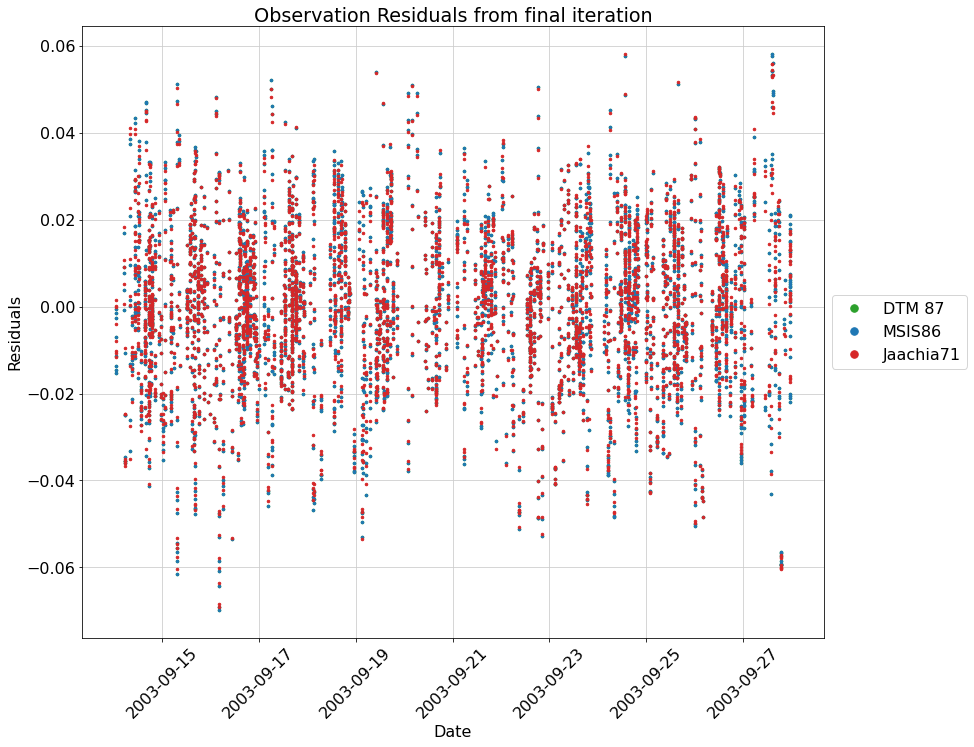

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1) = plt.subplots(1, figsize=(14,10), sharex=False)
ax1.set_title('Observation Residuals from final iteration')
ax1.plot(pd.to_datetime(Resids_dtm87['Date']), Resids_dtm87['Residual'].values.astype(float) ,'.', color = color87, label = 'DTM 87')
ax1.plot(pd.to_datetime(Resids_msis86['Date']), Resids_msis86['Residual'].values.astype(float) ,'.', color = color86,label = 'MSIS86' )
ax1.plot(pd.to_datetime(Resids_jaachia['Date']), Resids_jaachia['Residual'].values.astype(float) ,'.', color = color71,label = 'Jaachia71' )

# ax1.legend(l)
ax1.set(ylabel=  'Residuals')  
ax1.set(xlabel=  'Date')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels,  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 3 )


fig.tight_layout( pad=1.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



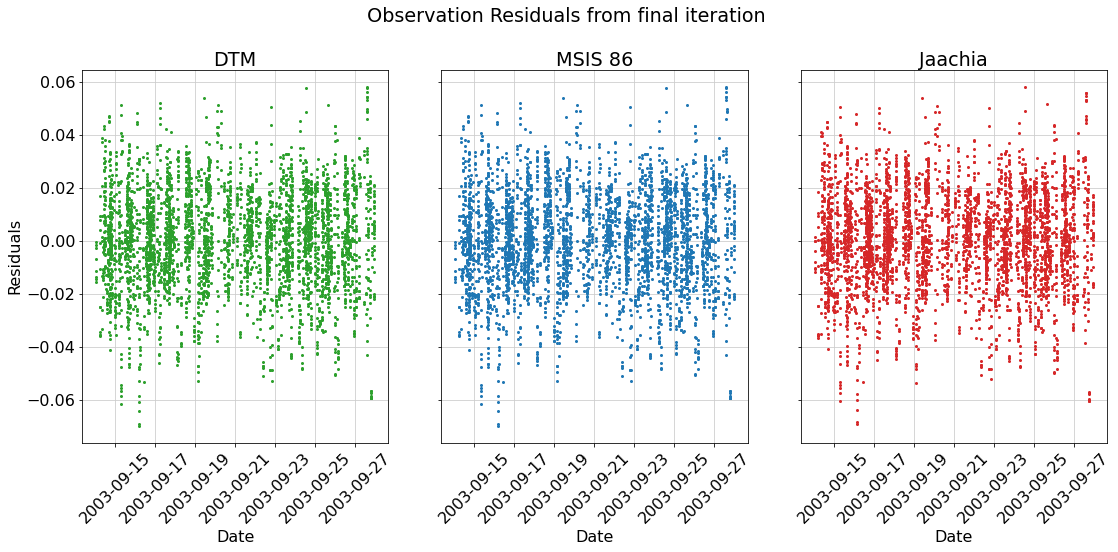

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 4
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,7), sharey=True)
fig.suptitle('Observation Residuals from final iteration')

ax1.set_title('DTM')
ax1.plot(pd.to_datetime(Resids_dtm87['Date']), Resids_dtm87['Residual'].values.astype(float) ,'.', color = color87, label = 'DTM 87')

ax2.set_title('MSIS 86')
ax2.plot(pd.to_datetime(Resids_msis86['Date']), Resids_msis86['Residual'].values.astype(float) ,'.', color = color86,label = 'MSIS86' )

ax3.set_title('Jaachia')
ax3.plot(pd.to_datetime(Resids_jaachia['Date']), Resids_jaachia['Residual'].values.astype(float) ,'.', color = color71,label = 'Jaachia71' )

ax1.set(ylabel=  'Residuals')  
ax1.set(xlabel=  'Date')  
ax2.set(xlabel=  'Date')  
ax3.set(xlabel=  'Date')  



fig.tight_layout()


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



## 4. Compare Cd

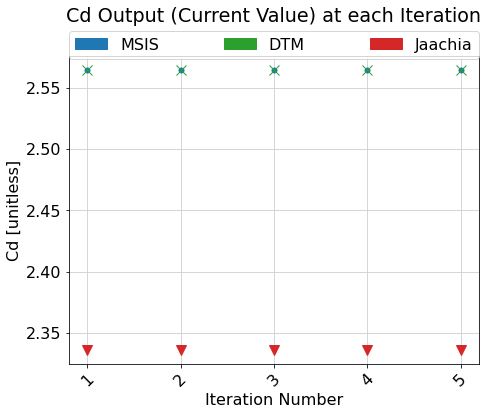

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'



color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
for i in AdjustedParams_msis86.keys():
    ax1.set_title('Cd Output (Current Value) at each Iteration', y=1.1)
    ax1.plot(i, AdjustedParams_msis86[i]['0CD']['T20'][2],'.', color = color86, label = 'MSIS 86 T01')
    ax1.plot(i, AdjustedParams_dtm87[i]['0CD']['T20'][2],'x', color = color87, label = 'DTM T01')
    ax1.plot(i, AdjustedParams_jaachia[i]['0CD']['T20'][2],'v', color = color71, label = 'Jaachia T01')

    
    ax1.set(ylabel=  'Cd [unitless]')  
    ax1.set(xlabel=  'Iteration Number')  
    msis_patch = mpatches.Patch(color=color86, label='MSIS')
    dtm_patch = mpatches.Patch(color=color87, label='DTM')
    jaachia_patch = mpatches.Patch(color=color71, label='Jaachia')

    fig.axes[0].legend( handles=[msis_patch, dtm_patch, jaachia_patch],bbox_to_anchor=(0, 1.0, 1.0, .08), ncol=3, mode="expand", borderaxespad=0.)

    fig.tight_layout( pad=1.0)


    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)



## 5. Arc overlaps
    - With enough arc/orbit solutions, you can look at the quality of orbit overlap.  With time series of arcs, you can judge the orbit quality by looking at the overlap



## 6. ~~Remove empirical accelerations~~
   ~~If you remove empirical accelerations, SLR data becomes good indicator of how well the dynamical model is representing the orbit~~
   
**this data contains empirical accelerations**


## 7. Use empirical accelerations
    - Use amplitude of empirical acceleration.  with reduced amplitudes, the model has been improved.


## 8. ~~Orbit determination (OD) plus a prediction~~
   ~~Comparing predicted with OD (w/o empirical accel.). Differences between orbit and actual tells you how good your models are.~~